In [91]:
import os, os.path as osp
from src.visualization.render_mp4 import unpickle_data
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
from glob import glob
import cv2

from src.visualization.render_mp4 import mp4_from_pickle_jupyter


In [2]:
base_path = Path("/data/scratch-oc40/pulkitag/ankile/furniture-data/")

low_bc_fail = base_path / "visualize/ol-state-dr-low-1/6i7hupje/raw/diffik/sim/one_leg/rollout/low/failure"
low_rl_succ = base_path / "visualize/ol-rppo-dr-low-1/kzlx4y3f/raw/diffik/sim/one_leg/rollout/low/success"
med_bc_fail = base_path / "visualize/ol-state-dr-med-1/9zjnzg4r/raw/diffik/sim/one_leg/rollout/med/failure"
med_rl_succ = base_path / "visualize/ol-rppo-dr-med-1/xeeg8wsc/raw/diffik/sim/one_leg/rollout/med/success"

sorted_paths_dict = {
    low_bc_fail: sorted([osp.join(low_bc_fail, fn) for fn in os.listdir(low_bc_fail)]),
    low_rl_succ: sorted([osp.join(low_rl_succ, fn) for fn in os.listdir(low_rl_succ)]),
    med_bc_fail: sorted([osp.join(med_bc_fail, fn) for fn in os.listdir(med_bc_fail)]),
    med_rl_succ: sorted([osp.join(med_rl_succ, fn) for fn in os.listdir(med_rl_succ)]),
} 

for k, v in sorted_paths_dict.items():
    print(len(v))

51
94
206
189


In [18]:
def get_run_sf_from_path(path):
    path = str(path)
    path = path.replace(str(base_path), "")
    run_id = "/".join(path.split("/")[2:4])
    sf = path.split("/")[-1]
    full_string = run_id + " " + sf
    return full_string

def make_vid(path, path_idx, overwrite=True, mp4fn='test.mp4'):
    pkl_path = sorted_paths_dict[path][path_idx]
    print(f'Pickle path: {pkl_path}')
    if overwrite and osp.exists(mp4fn):
        os.remove(mp4fn)
    mp4_from_pickle_jupyter(pkl_path, mp4fn, fps=20)

def show_frame(path, path_idx, frame_idx):
    pkl_path = sorted_paths_dict[path][path_idx]
    print(f'Pickle path: {pkl_path}')
    data = unpickle_data(pkl_path)
    obs = data["observations"][frame_idx].copy()
    img = obs["color_image2"].copy()
    plt.imshow(img)
    plt.title(f'Run {get_run_sf_from_path(path)}, Path index: {path_idx}, Frame {frame_idx}')
    plt.show()

def s2idx(sec, fps=20):
    frame = int(fps * sec)
    return frame

ii = 0

In [20]:
ii += 1
suf = str(ii)

# make_vid(low_bc_fail, 10)
# make_vid(low_rl_succ, 52)
make_vid(med_bc_fail, 30, mp4fn=f'test{suf}.mp4')
# make_vid(med_rl_succ, 5)

Pickle path: /data/scratch-oc40/pulkitag/ankile/furniture-data/visualize/ol-state-dr-med-1/9zjnzg4r/raw/diffik/sim/one_leg/rollout/med/failure/2024-06-04T17:44:30.845637.pkl
File saved as test2.mp4


Pickle path: /data/scratch-oc40/pulkitag/ankile/furniture-data/visualize/ol-state-dr-med-1/9zjnzg4r/raw/diffik/sim/one_leg/rollout/med/failure/2024-06-04T17:44:30.845637.pkl


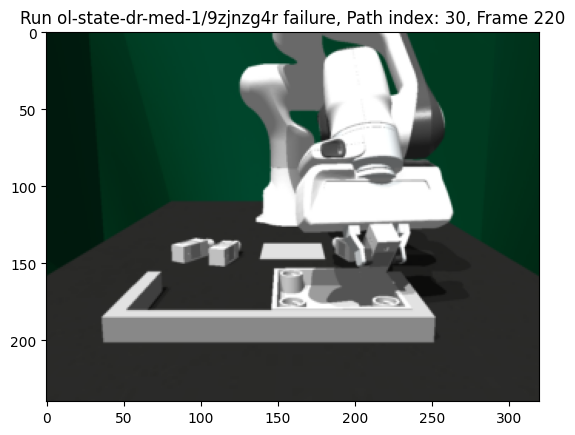

In [24]:
# show_frame(low_bc_fail, 10, s2idx(12.5))
# show_frame(low_rl_succ, 5, s2idx(9.7))
# show_frame(low_rl_succ, 52, s2idx(10.0))
show_frame(med_bc_fail, 30, s2idx(11.0))
# show_frame(med_rl_succ, 5, 2)

In [55]:
def plot_images(title, path, path_inds, obs_inds):
    images = []
    paths = sorted_paths_dict[path]
    # for idx, f in enumerate(paths):
    for i, idx in enumerate(path_inds):
        f = paths[idx]
        if idx not in path_inds:
            continue
        # print(f'File: {f}, Index: {idx}')
        data = unpickle_data(f)
        
        obs = data["observations"][obs_inds[i]].copy()

        images.append(obs["color_image2"].copy())
        
    # Plot the 4 images in a 2xN/2 grid
    fig, axs = plt.subplots(1, len(path_inds), figsize=(16, 3.25))
    # fig, axs = plt.subplots(2, len(path_inds) // 2, figsize=(7.95, 6))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.axis("off")

    # Remove whitespace between subplots
    plt.subplots_adjust(wspace=0, hspace=0)

    # Make a title with the randomness
    fig.suptitle(f"{title}", fontsize=20)

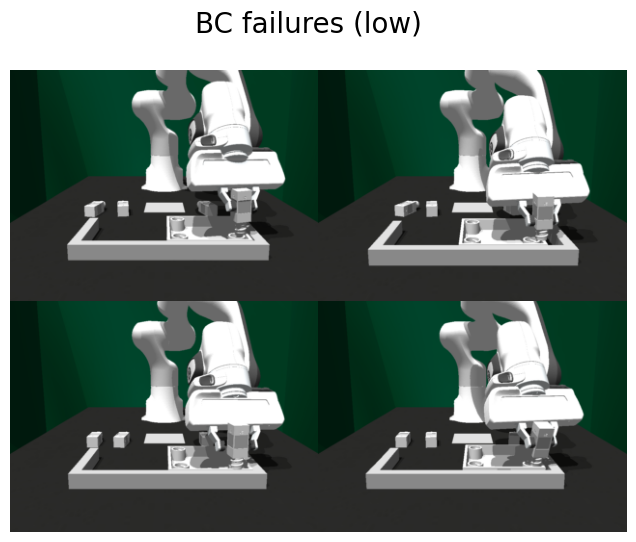

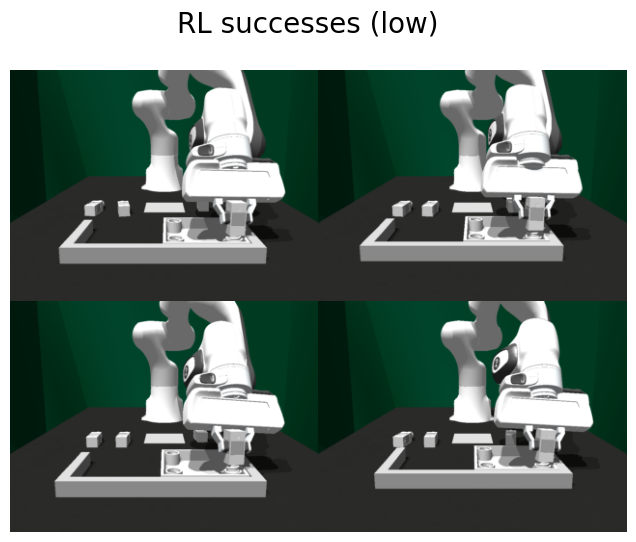

In [53]:
plot_images("BC failures (low)", low_bc_fail, [0, 2, 3, 10], [230, 360, 360, 250])
plot_images("RL successes (low)", low_rl_succ, [93, 5, 3, 52], [216, 194, 224, 200])

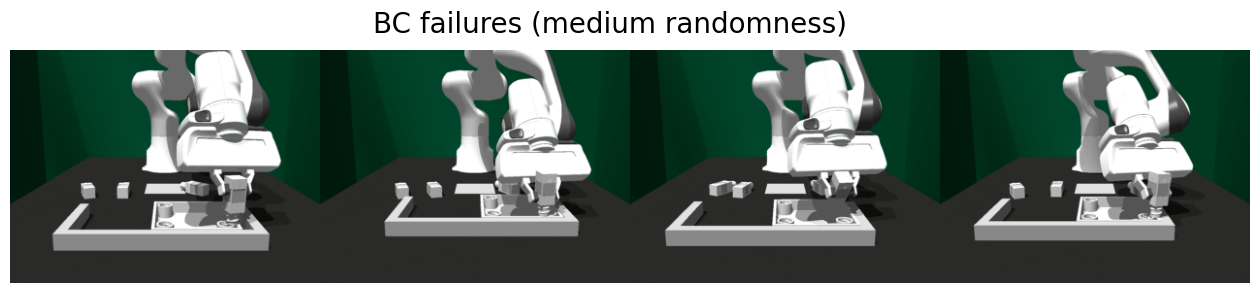

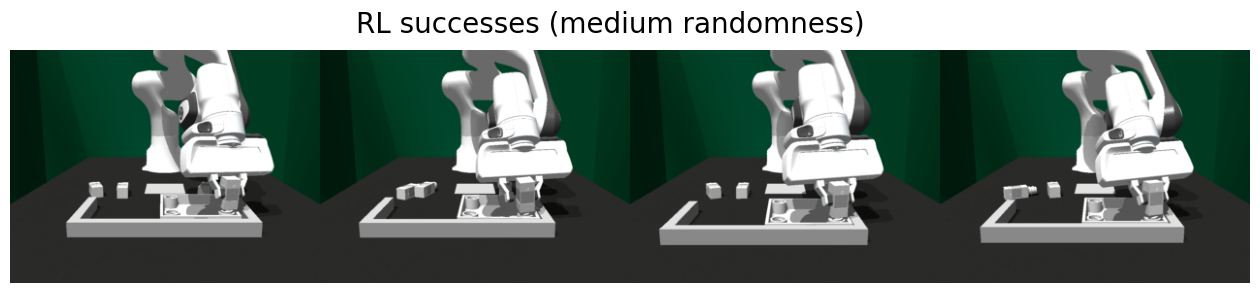

In [56]:
plot_images("BC failures (medium randomness)", med_bc_fail, [0, 2, 30, 52], [250, 360, 220, 276]) # (3, 360)
plot_images("RL successes (medium randomness)", med_rl_succ, [93, 5, 3, 52], [288, 320, 219, 240])

In [100]:
def get_img(obs):
    # return obs["color_image2"].copy() / 255.0
    return obs["color_image2"].copy()


def remove_bg(image):
    # Convert the image from BGR to HSV color space
    hsv_image = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2HSV)
    # hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define the lower and upper bounds for the shades of green you want to filter out
    lower_green = np.array([25, 40, 40])   # Adjust these values as needed
    # lower_green = np.array([35, 40, 40])   # Adjust these values as needed
    upper_green = np.array([85, 255, 255]) # Adjust these values as needed

    # Create a mask for the green shades
    mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Invert the mask to get the non-green areas
    mask_inv = cv2.bitwise_not(mask)

    # Use the mask to extract the non-green parts of the image
    result = cv2.bitwise_and(image, image, mask=mask_inv)
    return result

    # Optional: Replace the green areas with a white background
    # white_background = np.ones_like(image, dtype=np.uint8) * 255
    # green_removed = cv2.add(white_background, result, mask=mask)
    # return green_removed


def blend(images):
    # a1, a2, a3 = 0.8, 0.5, 0.3
    a1, a2, a3 = 0.5, 0.5, 0.5
    blended = (a1 * images[0] + a2 * images[1] + a3 * images[2]) / (a1 + a2 + a3)

    a1, a2, a3 = 0.5, 0.5, 0.0
    blended = (a1 * images[0] + a2 * images[1] + a3 * images[2]) / (a1 + a2 + a3)

    return (blended * 255).astype(np.uint8)


def blend_no_bg(images):
    no_bg_images = [remove_bg(img.copy()) for img in images]
    no_bg_images = [img / 255.0 for img in no_bg_images]
    return blend(no_bg_images)


def plot_images_overlay(title, path, path_inds, obs_inds):
    images = []
    paths = sorted_paths_dict[path]
    # for idx, f in enumerate(paths):
    for i, idx in enumerate(path_inds):
        f = paths[idx]
        if idx not in path_inds:
            continue
        # print(f'File: {f}, Index: {idx}')
        data = unpickle_data(f)
        
        obs_all = data["observations"]
        n_obs = len(obs_all)

        # images.append(obs["color_image2"].copy())
        img_list = []
        img_list.append(get_img(obs_all[obs_inds[i]]))
        img_list.append(get_img(obs_all[int(0.02 * n_obs)]))
        # img_list.append(get_img(obs_all[int(0.6 * obs_inds[i])]))
        img_list.append(get_img(obs_all[int(0.9 * n_obs)]))
        images.append(img_list)
        
    # Plot the 16 images in a 4x4 grid
    fig, axs = plt.subplots(1, len(path_inds), figsize=(16, 3.25))
    for i, ax in enumerate(axs.flat):
        # ax.imshow(images[i])
        # ax.imshow(images[i][1], alpha=0.4)
        # ax.imshow(images[i][2], alpha=0.25)
        # ax.imshow(images[i][3], alpha=0.25)
        # ax.imshow(images[i][0], alpha=0.9)

        # blended_img = blend(images[i])
        blended_img = blend_no_bg(images[i])

        ax.imshow(blended_img)
        ax.axis("off")

    # Remove whitespace between subplots
    plt.subplots_adjust(wspace=0, hspace=0)

    # Make a title with the randomness
    fig.suptitle(f"{title}", fontsize=20)

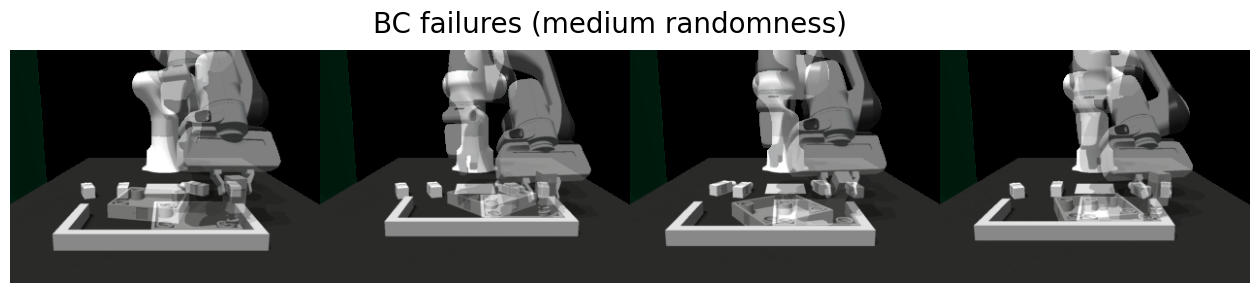

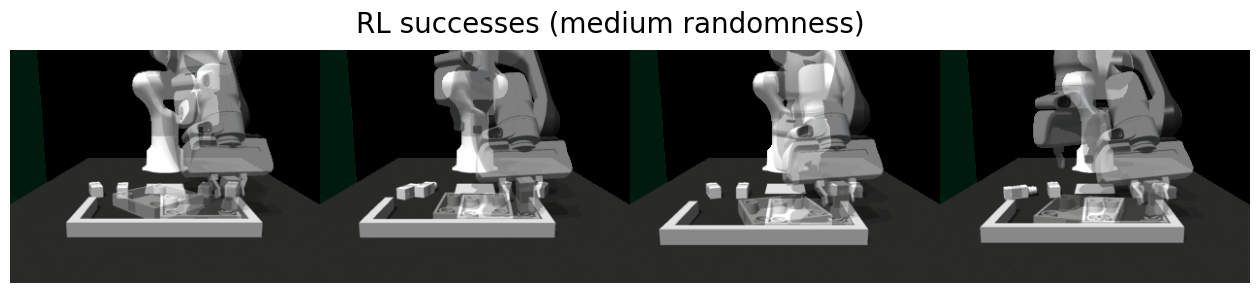

In [101]:
plot_images_overlay("BC failures (medium randomness)", med_bc_fail, [0, 2, 30, 52], [250, 360, 220, 276]) # (3, 360)
plot_images_overlay("RL successes (medium randomness)", med_rl_succ, [93, 5, 3, 52], [288, 320, 219, 240])